In [1]:
import numpy as np
import rubin_sim.maf as maf
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
filename = 'baseline_v2.0_10yrs.db'
run_name = filename.replace('.db', '')

In [3]:
bundle_list = []
metric = maf.PassMetric(cols=['night', 'filter'])
sql = 'visitexposuretime > 20'
slicer = maf.UserPointsSlicer(ra=[0.], dec=[-20.])

bundle_list.append(maf.MetricBundle(metric, slicer, sql))
bd = maf.make_bundles_dict_from_list(bundle_list)

In [4]:
mbg = maf.MetricBundleGroup(bd, filename, out_dir='temp')

In [5]:
mbg.run_all()

In [6]:
data = bundle_list[0].metric_values[0]

In [7]:
data.size

851

Text(0.5, 1.0, '851 observations on 338 unique nights\nall filters')

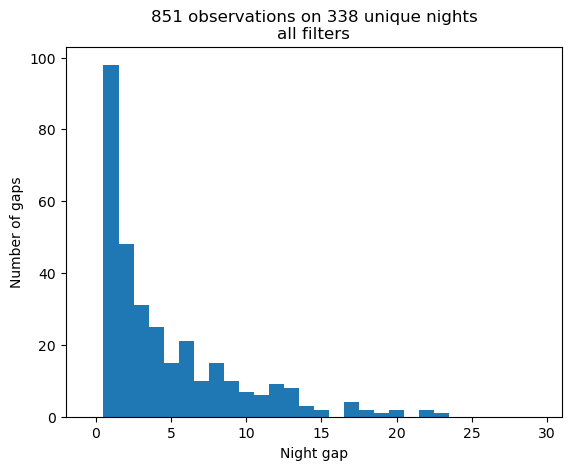

In [8]:
un = np.unique(data['night'])
_temp = plt.hist(np.diff(un), bins=np.arange(31)-0.5)
plt.xlabel('Night gap')
plt.ylabel('Number of gaps')
plt.title('%i observations on %i unique nights\nall filters' % (data.size, un.size))

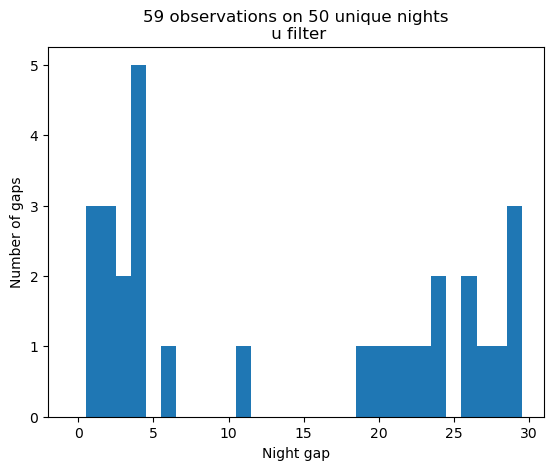

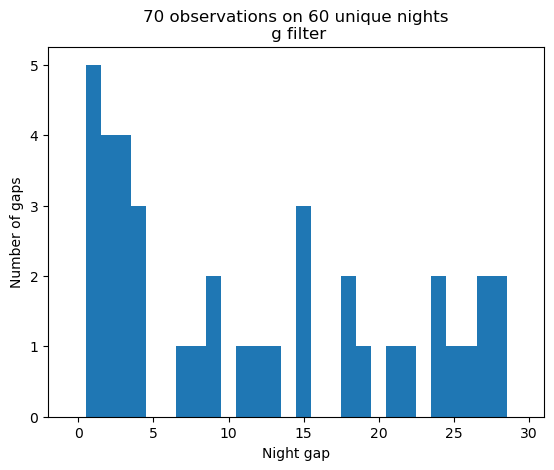

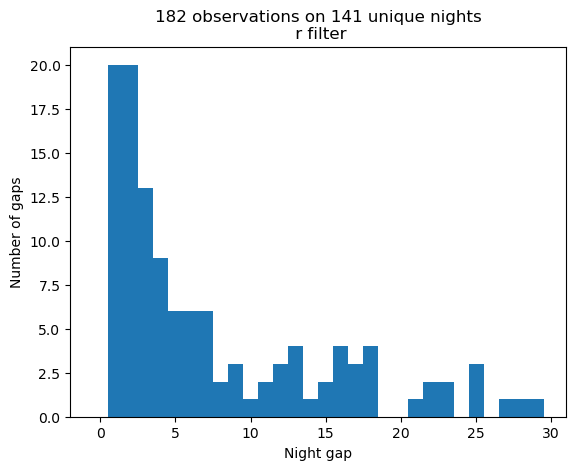

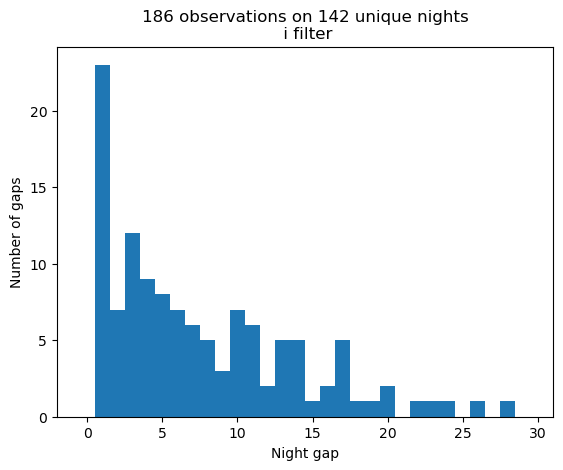

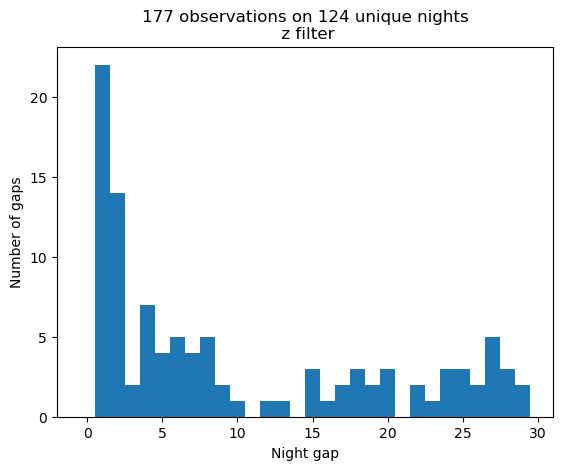

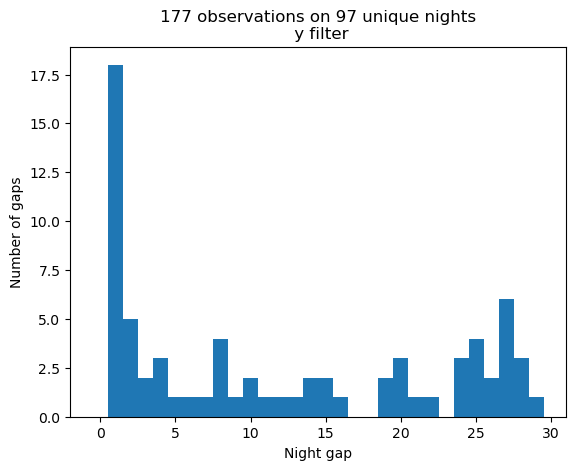

In [9]:
for filtername in 'ugrizy':
    plt.figure()
    in_filt = np.where(data['filter'] == filtername)[0]
    un = np.unique(data['night'][in_filt])
    _temp = plt.hist(np.diff(un), bins=np.arange(31)-0.5)
    plt.xlabel('Night gap')
    plt.ylabel('Number of gaps')
    plt.title('%i observations on %i unique nights\n %s filter' % (in_filt.size, un.size, filtername))